In [1]:
from core.preprocessing import make_small_train, make_small_dev, StatisticalClearSky, DataManager, make_batch, CenterScale
import numpy as np
import pandas as pd
df = pd.read_pickle('data/master_dataset.pkl').fillna(0)
df = df.loc['2015-07-15':'2017-07-14']
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', context='talk')

In [2]:
def plot_trends_and_total(df, start=None, stop=None):
    if start is None:
        start = df.index[0]
    if stop is None:
        stop = df.index[-1]
    cols = df.columns
    fig, axes = plt.subplots(nrows=2, figsize=(12,10), sharex=True)
    df.loc[start:stop].plot(y=cols[:-1], legend=False, linewidth=1, ax=axes[0])
    df.loc[start:stop].plot(y=cols[-1], linewidth=1, ax=axes[1])

mixed = make_small_train(df, 'mixed')
plot_trends_and_total(mixed)

sunny = make_small_train(df, 'sunny')
plot_trends_and_total(sunny)

cloudy = make_small_train(df, 'cloudy')
plot_trends_and_total(cloudy)

comb = make_small_train(df, 'combined')
plot_trends_and_total(comb)

dev = make_small_dev(df)
plot_trends_and_total(dev)

from core.problems import ManyToOneRegression

# Problem parameters
window = 5*12 # window size (to be determined from correlation analysis)
future = 3*12  # prediction window into the future

# Optimization parameters
nepochs = 50
batchsize = 1000

problem = ManyToOneRegression(mixed, window=window, future=future)

feat = problem.featurize(100)

%time np.array([mixed.iloc[i:i+window, :-1].values.ravel() for i in xrange(len(mixed) - problem.window - problem.future)]).shape

mixed.shape

i = 75
mixed.iloc[i:i+window, :-1].values.ravel()

In [ ]:
dm = DataManager()
dm.load_all_and_split(reindex=True)

In [ ]:
scale = CenterScale(y_data=-1)
scale.fit(dm.original_train)

In [ ]:
test = scale.apply(dm.original_train)

In [ ]:
test['S03'].plot()

In [ ]:
plot_trends_and_total(test)

In [ ]:
dm.swap_index()

In [3]:
present = 3*12
future = 3*12

dm = DataManager()
dm.load_all_and_split(kind='all')
dftrain = dm.original_train
dfdev = dm.original_dev

In [ ]:
X, Y = make_batch(dftrain, 100, present, future, exo=True)

In [ ]:
X.shape

In [ ]:
X[4,-5:]

In [ ]:
for s in xrange(20):
    plt.plot(X[52,s*present:(s+1)*present])

In [ ]:
[plt.plot(Y[52])]

In [ ]:
dftrain.index.time[0]

In [ ]:
X.shape

In [ ]:
from scipy.signal import fftconvolve

In [ ]:
def std_window_1(signal, window):
    s = fftconvolve(signal, np.ones(window), mode='same')
    q = fftconvolve(np.power(signal, 2), np.ones(window), mode='same')
    var = (q - np.power(s, 2) *1./ window) / (window - 1)
    stdev = np.sqrt(var)
    return stdev

In [ ]:
def std_window_2(signal, window):
    if isinstance(signal, pd.core.series.Series):
        stdev = signal.rolling(window=window, center=True).std()
    else:
        series = pd.Series(data=signal)
        stdev = series.rolling(window=window, center=True).std()
    return stdev

In [ ]:
def totalvar(arr):
    diff = arr[:-1] - arr[1:]
    return np.sum(np.abs(diff))

def totalvar_window(signal, window):
    if isinstance(signal, pd.core.series.Series):
        stdev = signal.rolling(window=window, center=True).apply(totalvar)
    else:
        series = pd.Series(data=signal)
        stdev = series.rolling(window=window, center=True).std()
    return stdev

In [ ]:
%timeit std_window_1(dm.original_train['total_power'], 5)

In [ ]:
%timeit std_window_2(dm.original_train['total_power'], 5)

In [ ]:
plt.plot(std_window_2(dm.original_full['total_power'].iloc[100*3*2:100*3*5], window=24), linewidth=1)

In [ ]:
plt.plot(totalvar_window(dm.detrended_full['total_power'].iloc[100*3*2:100*3*5], window=24), linewidth=1)

In [ ]:
plot_trends_and_total(dm.original_full.iloc[100*3*2:100*3*5])

In [6]:
dm.make_error_target()

In [10]:
dm.error_full

,error_target
2015-07-15 00:00:00,NaN
2015-07-15 00:05:00,NaN
2015-07-15 00:10:00,NaN
2015-07-15 00:15:00,NaN
2015-07-15 00:20:00,NaN
2015-07-15 00:25:00,NaN
2015-07-15 00:30:00,NaN
2015-07-15 00:35:00,NaN
2015-07-15 00:40:00,NaN
2015-07-15 00:45:00,NaN


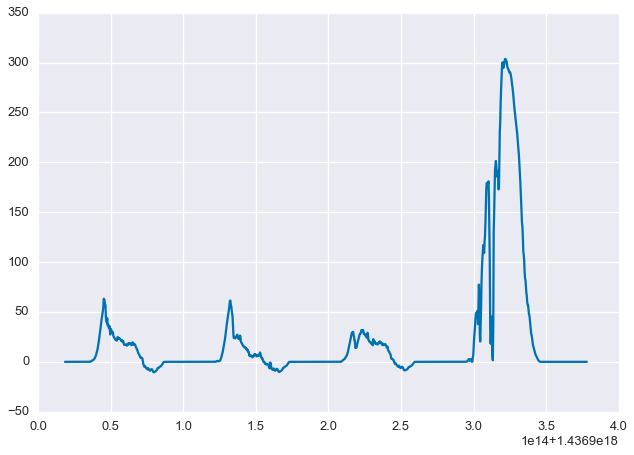

In [11]:
plt.plot(dm.detrended_full['total_power'][:1200])

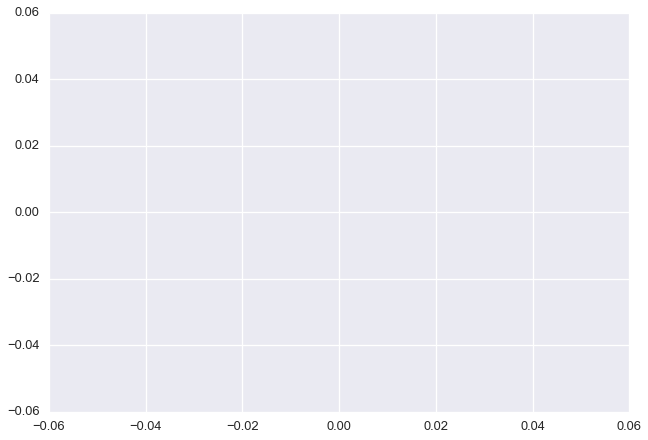

In [9]:
plt.plot(dm.error_full[:1200])

In [13]:
from core.utilities import totalvar_window

In [18]:
df1 = pd.DataFrame(data=totalvar_window(dm.detrended_full['total_power'], 24))
df1.columns= ['error_target']
df1

,error_target
2015-07-15 00:00:00,NaN
2015-07-15 00:05:00,NaN
2015-07-15 00:10:00,NaN
2015-07-15 00:15:00,NaN
2015-07-15 00:20:00,NaN
2015-07-15 00:25:00,NaN
2015-07-15 00:30:00,NaN
2015-07-15 00:35:00,NaN
2015-07-15 00:40:00,NaN
2015-07-15 00:45:00,NaN
